##### Title: Exercice 10.8
##### Author: Jerock Kalala
##### Date: Febuary 22th 2023
##### Modified By: --
##### Project Milestone 4: Model building



You need to get the data into a usable format and perform at least three different aspects of feature engineering (depending on what kind of model you plan to build). If the data is a PDF, you’ll use the technique you’ve learned so far to extract the text (I suggest this approach if you can find suitable PDF data). If the data is a CSV, it’ll be easier to ingest the data.
Once you have the data, you’ll use at least three different feature engineering techniques to understand your corpus.

Examples
- Normalize the corpus, including converting to lower case and removing stop words
- Bag of Words modeling
- Bag of N-Grams modeling
- Topic modeling
- Clustering

In [34]:
import string
import pandas as pd
import numpy as np
import re
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import spacy
import string
nlp = spacy.load("en_core_web_sm")


#### Data Collection & Pre-Processing

In [35]:
corpus = pd.read_csv("E:\\Bellevue\\Winter_2022\\DSC 360 Data Mining Text Analytics an\\Term project\\2emails.csv")
corpus.head()

,Message,Category
0,Subject: naturally irresistible your corporate...,spam
1,Subject: the stock trading gunslinger fanny i...,spam
2,Subject: unbelievable new homes made easy im ...,spam
3,Subject: 4 color printing special request add...,spam
4,"Subject: do not have money , get software cds ...",spam


- First, We'll need to know the dataset and the data characteristics:

In [36]:
print("The shape is: ", corpus.shape, "\n")
#Checking the type of data
corpus.info()

The shape is:  (5734, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5734 entries, 0 to 5733
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Message   5730 non-null   object
 1   Category  5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


- Checking for missing data and duplicate data --drop them

In [37]:
#check for duplicates and remove them
corpus.drop_duplicates(inplace=True)

#replace the null value with null string
new_corpus = corpus.where((pd.notnull(corpus)), '')

#check if we still have any missing data
new_corpus.isnull().sum()

Message     0
Category    0
dtype: int64

In [38]:
#Checking the actual shape
count_null = new_corpus['Message'].isnull().sum()
count_nan = new_corpus['Category'].isnull().sum()
print("number of empty message: ", count_null)
print("number of empty Category: ", count_nan)
print(corpus.shape)
print(new_corpus.shape)

number of empty message:  0
number of empty Category:  0
(5698, 2)
(5698, 2)


In [39]:
new_corpus.dtypes

Message     object
Category    object
dtype: object

- Label encoding

In [40]:
#label mails
new_corpus.loc[new_corpus['Category'] == 'spam', 'Category'] =0
new_corpus.loc[new_corpus['Category'] == 'ham', 'Category'] = 1

#Here is the observation:
print("1. In our dataset, we have {} of emails" .format(new_corpus.shape[0]))
print("2. category = 1 means a spam email and category =0 means a ham email")

1. In our dataset, we have 5698 of emails
2. category = 1 means a spam email and category =0 means a ham email


In [41]:
new_corpus.head()

,Message,Category
0,Subject: naturally irresistible your corporate...,0
1,Subject: the stock trading gunslinger fanny i...,0
2,Subject: unbelievable new homes made easy im ...,0
3,Subject: 4 color printing special request add...,0
4,"Subject: do not have money , get software cds ...",0


- Defining the cleaning function

In [42]:
#normalize function

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('English')

def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    #tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    doc = re.sub('\n',' ',doc)
    return doc

normalize_corpus = np.vectorize(normalize_document)

def clean_mails(doc):
    doc = doc.str.replace('[^\w\s]', '', regex=True)
    doc = doc.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return doc

def cleaning(doc):
    #remove punctuation
  text = [char for char in doc if char not in string.punctuation]
  text = ''.join(text)
    #convert all text to lower case
  text = text.lower()
    #remove stop_words
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return doc

#new_corpus['email'] = new_corpus['Message'].apply(cleaning)

- Cleaning our data

In [48]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
new_corpus['Mail_token'] = new_corpus['Mail'].apply(regexp.tokenize)
new_corpus.head()

,Message,Category,Mail,Mail_token
0,Subject: naturally irresistible your corporate...,0,subject naturally irresistible corporate ident...,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,0,subject stock trading gunslinger fanny merrill...,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,0,subject unbelievable new homes made easy im wa...,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,0,subject color printing special request additio...,"[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",0,subject money get software cds software compat...,"[subject, money, get, software, cds, software,..."


#### Bag of Words

In [44]:
#BOW

print('Bag of Words Model')
# starting on page 208
from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
count_vector = CountVectorizer(min_df=0., max_df=1.)
count_vector_matrix = count_vector.fit_transform(new_corpus['Mail'])

# view non-zero feature positions in the sparse matrix
print("\nNon-zero feature positions in the sparse matrix:")
print(count_vector_matrix, '\n')

# view dense representation (warning - might give a memory error if the data is too big)
count_vector_matrix = count_vector_matrix.toarray()
print("\nDense representation of the matrix:")
print(count_vector_matrix, '\n')

# get all unique words in the corpus
vocab = count_vector.get_feature_names_out()

#show document feature vectors
count_vector_df = pd.DataFrame(count_vector_matrix, columns=vocab)
print("\nAll document feature vectors:")
print(count_vector_df, '\n')


Bag of Words Model

Non-zero feature positions in the sparse matrix:
  (0, 30043)	1
  (0, 21089)	1
  (0, 16569)	1
  (0, 7805)	1
  (0, 15424)	1
  (0, 18864)	1
  (0, 25698)	1
  (0, 14406)	1
  (0, 25822)	1
  (0, 7036)	3
  (0, 19377)	2
  (0, 13163)	1
  (0, 30307)	1
  (0, 15966)	1
  (0, 16614)	1
  (0, 13822)	2
  (0, 5794)	1
  (0, 18676)	3
  (0, 30024)	1
  (0, 29673)	1
  (0, 22559)	1
  (0, 33726)	2
  (0, 19155)	2
  (0, 30742)	1
  (0, 20761)	2
  :	:
  (5697, 13946)	1
  (5697, 20531)	1
  (5697, 5661)	1
  (5697, 22539)	2
  (5697, 19347)	1
  (5697, 3471)	9
  (5697, 28641)	1
  (5697, 11076)	1
  (5697, 10865)	1
  (5697, 15116)	1
  (5697, 11868)	1
  (5697, 17997)	1
  (5697, 29532)	1
  (5697, 10866)	1
  (5697, 18191)	1
  (5697, 32990)	1
  (5697, 6369)	1
  (5697, 27790)	1
  (5697, 11260)	5
  (5697, 33886)	1
  (5697, 27994)	1
  (5697, 15318)	1
  (5697, 31628)	1
  (5697, 8113)	1
  (5697, 9125)	1 


Dense representation of the matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0

- N-Grams

In [45]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(new_corpus['Mail'])
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
bv_df = pd.DataFrame(bv_matrix, columns=vocab)
print(bv_df, '\n')

      00 00  00 000  00 0009249480  00 01  00 03  00 04  00 05  00 06  \
0         0       0              0      0      0      0      0      0   
1         0       0              0      0      0      0      0      0   
2         0       0              0      0      0      0      0      0   
3         0       0              0      0      0      0      0      0   
4         0       0              0      0      0      0      0      0   
...     ...     ...            ...    ...    ...    ...    ...    ...   
5693      0       0              0      0      0      0      0      0   
5694      0       0              0      0      0      0      0      0   
5695      0       0              0      0      0      0      0      0   
5696      0       0              0      0      0      0      0      0   
5697      0       0              0      0      0      0      0      0   

      00 0600  00 07  ...  zygoma um  zymg dolly  zymg ollie  zymg rodger  \
0           0      0  ...          0          

- Term Frequency-Inverse Document Frequency

In [46]:
#Tf-Idf Transformer
from sklearn.feature_extraction.text import TfidfTransformer

print('Tfidf transformer:')
term = TfidfTransformer(norm = 'l2', use_idf=True)
term_matrix = term.fit_transform(count_vector_matrix)
term_matrix = term_matrix.toarray()
vocab = count_vector.get_feature_names_out()
print(pd.DataFrame(np.round(term_matrix, 2), columns=vocab), '\n')

Tfidf transformer:
       00  000  0000  00000000  0000000000  0000102789  0000104281  \
0     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
1     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
2     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
3     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
4     0.0  0.0   0.0       0.0         0.0         0.0         0.0   
...   ...  ...   ...       ...         ...         ...         ...   
5693  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5694  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5695  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5696  0.0  0.0   0.0       0.0         0.0         0.0         0.0   
5697  0.0  0.0   0.0       0.0         0.0         0.0         0.0   

      0000104486  0000104631  0000104730  ...  zwzm  zxghlajf  zyban  zyc  \
0            0.0         0.0         0.0  ...   0.0       0.0  

#### Model

In [49]:
df = new_corpus.drop(['Message'], axis=1)
df.fillna(0)
df.head(20)

,Category,Mail,Mail_token
0,0,subject naturally irresistible corporate ident...,"[subject, naturally, irresistible, corporate, ..."
1,0,subject stock trading gunslinger fanny merrill...,"[subject, stock, trading, gunslinger, fanny, m..."
2,0,subject unbelievable new homes made easy im wa...,"[subject, unbelievable, new, homes, made, easy..."
3,0,subject color printing special request additio...,"[subject, color, printing, special, request, a..."
4,0,subject money get software cds software compat...,"[subject, money, get, software, cds, software,..."
5,0,subject great nnews hello welcome medzonline s...,"[subject, great, nnews, hello, welcome, medzon..."
6,0,subject hot play motion homeland security inve...,"[subject, hot, play, motion, homeland, securit..."
7,0,subject save money buy getting thing tried cia...,"[subject, save, money, buy, getting, thing, tr..."
8,0,subject undeliverable home based business grow...,"[subject, undeliverable, home, based, business..."
9,0,subject save money buy getting thing tried cia...,"[subject, save, money, buy, getting, thing, tr..."


- Plot --Class distribution

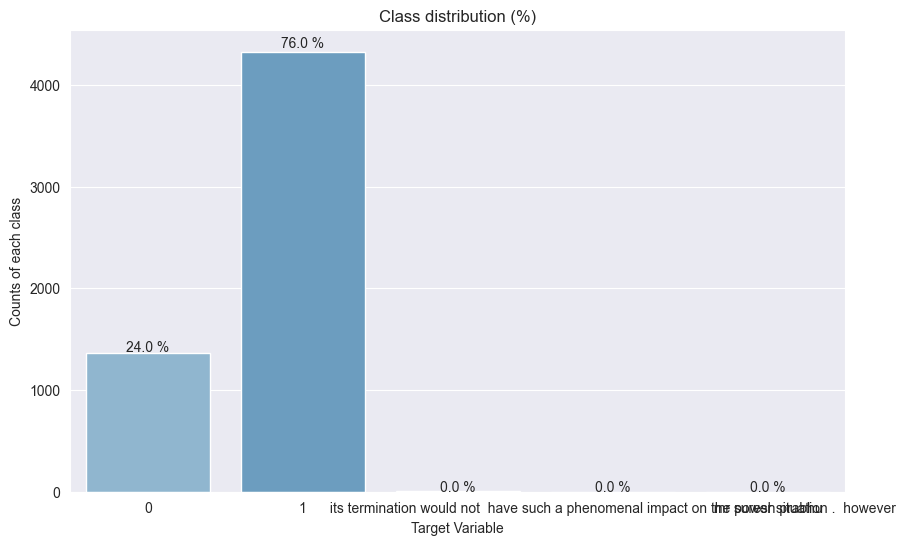

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
f = sns.countplot(x = df['Category'], palette="Blues_d")
plt.xlabel('Target Variable')
plt.ylabel('Counts of each class')
plt.title('Class distribution (%)')
for p in f.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height/df.shape[0], 2)*100} %', (x + width/2, y + height*1.01), ha='center')

- Converting words to vectors using TF-IDF Vectorizer

In [53]:
#convert the Mail data into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

classif = LogisticRegression()
vectorizer = TfidfVectorizer()

#vectors = vectorizer.fit_transform(corpus[])
vectors = vectorizer.fit_transform(df['Mail'])
#features = vectors
#print("This is the vector shape: ", vectors.shape)
print("This is the vector shape: ", vectors.shape)

This is the vector shape:  (5698, 34928)


- Splitting into training and test set

In [54]:
from sklearn.model_selection import train_test_split

z = df['Mail']
w = df['Category'].values.astype('U')
z_train, z_test, w_train,w_test = train_test_split(z, w, test_size = 0.27, random_state = 42)
print('Data_train :', len(z_train))
print('Data_test  :', len(z_test))
print('Target_train :', len(w_train))
print('Target_test  :', len(w_test))

Data_train : 4159
Data_test  : 1539
Target_train : 4159
Target_test  : 1539


- Model Pipeline

In [55]:
#Create Model Pipeline

from sklearn.pipeline import Pipeline

model = Pipeline([('Vectorizer',vectorizer),('Classifier',classif)])
model.fit(z_train, w_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

- Prediction on test data

In [58]:
# predict on the test set
y_pred = model.predict(z_test)
x_pred = model.predict(z_train)
y_pred[:20]

array(['1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0',
       '1', '1', '1', '0', '0', '1', '0'], dtype='<U92')